In [ ]:
pip install pandas seaborn matplotlib apache-airflow

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)
df

C:\Users\Kulani.Melaku\AppData\Local\Temp\ipykernel_17816\311512837.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)
C:\Users\Kulani.Melaku\AppData\Local\Temp\ipykernel_17816\311512837.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("../data/20181024_d1_0830_0900.csv", sep="[;]", index_col=False)


,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time
0,1,Car,48.85,9.770344,37.977391,23.737688,4.9178,0.0518,-0.0299,0.0
1,2,Motorcycle,98.09,19.839417,37.977642,23.737400,16.9759,-0.0361,-0.0228,0.0
2,3,Motorcycle,63.80,18.228752,37.977997,23.737264,20.1906,-0.0795,-0.3395,0.0
3,4,Motorcycle,145.72,26.229014,37.978135,23.737072,2.7555,-0.0302,0.0948,0.0
4,5,Motorcycle,138.01,24.841425,37.978134,23.737103,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...
917,918,Car,78.83,30.846243,37.980629,23.735083,38.2160,0.0372,-0.0533,809.6
918,919,Motorcycle,19.50,9.234518,37.979327,23.735628,2.9344,0.0011,-0.0237,811.2
919,920,Car,48.97,24.486209,37.978413,23.735528,22.8316,-0.0250,-0.0808,811.6
920,921,Motorcycle,46.68,30.007124,37.980020,23.736861,32.3581,-0.0493,-0.1050,813.2


In [2]:
with open("../data/20181024_d1_0830_0900.csv", 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()
    
lines_as_lists = [line.strip('\n').strip().strip(';').split(';') for line in lines] 


In [3]:
cols = lines_as_lists.pop(0)

In [4]:

track_cols = cols[:4]
trajectory_cols = ['track_id'] + cols[4:]

In [5]:
track_info = []
trajectory_info = []
for row in lines_as_lists:
    track_id = row[0]

    # add the first 4 values to track_info
    track_info.append(row[:4]) 

    remaining_values = row[4:]
    # reshape the list into a matrix and add track_id
    trajectory_matrix = [ [track_id] + remaining_values[i:i+6] for i in range(0,len(remaining_values),6)]
    # add the matrix rows to trajectory_info
    trajectory_info = trajectory_info + trajectory_matrix
    
df_trajectory = pd.DataFrame(data= trajectory_info,columns=trajectory_cols)

df_trajectory.head()


df_trajectory.to_csv('trajectory_table.csv', index=False)

In [7]:
df_track_info = pd.DataFrame(data= track_info,columns=track_cols)

df_track_info.head()

# save track data to csv

df_track_info.to_csv('track_table.csv', index=False)


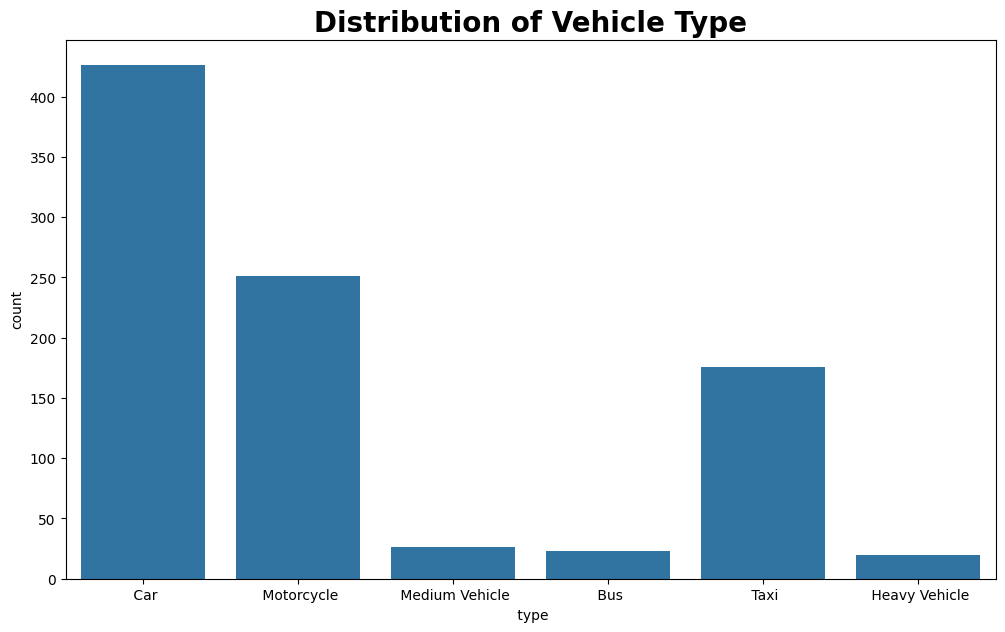

In [10]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=" type")
plt.title(f'Distribution of Vehicle Type', size=20, fontweight='bold')
plt.show()